# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np #added for additional capabilities

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(study_results,mouse_metadata, on="Mouse ID")

# Display the data table for preview
merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [3]:
# Checking the number of mice.
#unique_mice = merged_data["Mouse ID"].unique()
len(merged_data["Mouse ID"].unique())

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merged_duplicates = merged_data[merged_data.duplicated(["Mouse ID","Timepoint"])]
merged_duplicates["Mouse ID"].unique()

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
merged_data[merged_data["Mouse ID"] == "g989"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_data.copy()
clean_df = clean_df.drop(clean_df[clean_df["Mouse ID"] == "g989"].index)
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [7]:
# Checking the number of mice in the clean DataFrame.
len(clean_df["Mouse ID"].unique())

248

## Summary Statistics

In [9]:
#drugs = []
#drugs = clean_df["Drug Regimen"].unique()
#clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [10]:
#clean_df["Drug Regimen"].values

array(['Capomulin', 'Capomulin', 'Capomulin', ..., 'Capomulin',
       'Capomulin', 'Capomulin'], dtype=object)

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_tumor_volume_df = pd.DataFrame(
    {"Mean Tumor Volume" : clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean(),
     "Median Tumor Volume" : clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median(),
     "Tumor Volume Variance" : clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var(),
     "Tumor Volume Std. Dev." : clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std(),
     "Tumor Volume Std. Err." : clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem(),
     }
)
summary_tumor_volume_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
clean_df.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

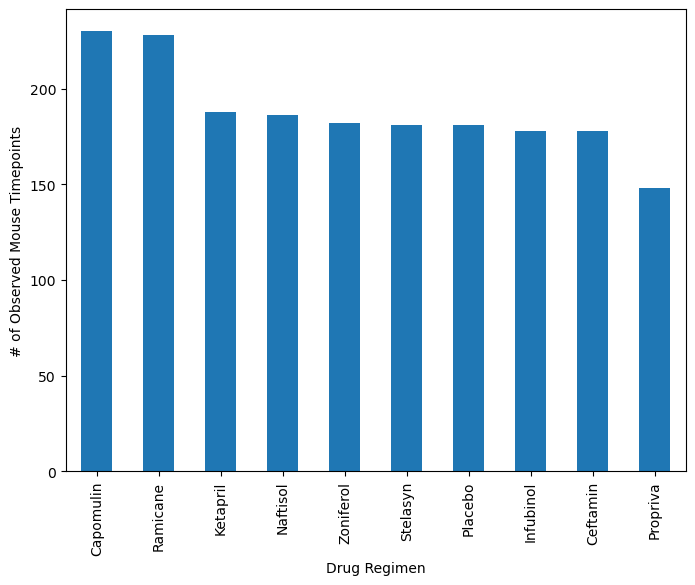

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_data = clean_df["Drug Regimen"].value_counts()
#regimen_data

regimen_data.plot(kind = "bar", figsize=(8,6), xlabel="Drug Regimen", 
                  ylabel="# of Observed Mouse Timepoints")
plt.show()

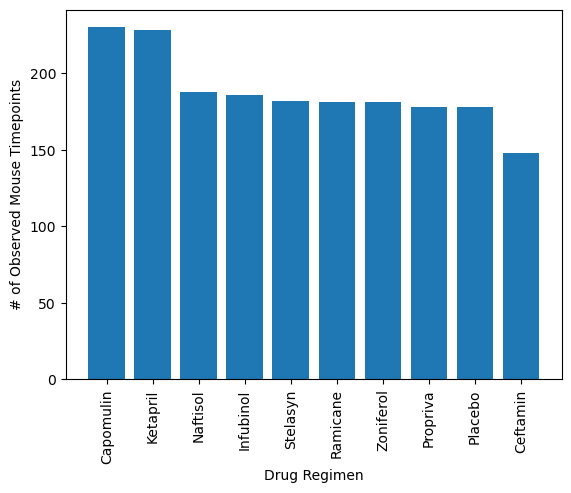

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = np.arange(0, len(regimen_data))
plt.bar(x_axis, regimen_data, align="center")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, clean_df["Drug Regimen"].unique(), rotation="vertical")

plt.show()

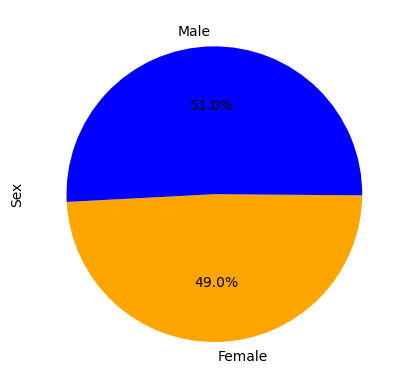

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_groups_df = clean_df.groupby("Sex")
mouse_genders = gender_groups_df["Sex"].count()
mouse_genders.plot.pie(autopct="%1.1f%%", colors=["orange","blue"], startangle=183)
plt.show()

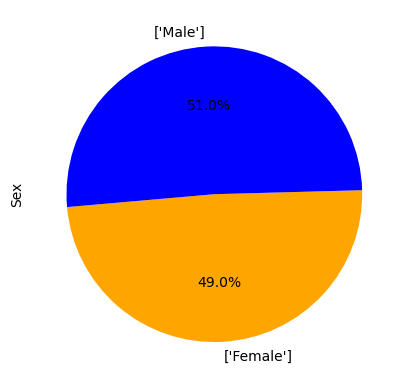

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = gender_groups_df["Sex"].unique()
values = mouse_genders / len(clean_df) * 100
fig, ax = plt.subplots()
ax.pie(values, labels=labels, autopct="%1.1f%%", startangle=185, colors=["orange","blue"])
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [32]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = study_results.groupby(["Mouse ID"]).max(["Timepoint"])

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_last_timepoints = pd.merge(last_timepoints, mouse_metadata, how="inner", on="Mouse ID")
merged_last_timepoints

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,45.000000,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


In [49]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin"]#, "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_vol = merged_last_timepoints.loc[
        merged_last_timepoints["Drug Regimen"] == treatment, ("Drug Regimen", "Tumor Volume (mm3)")
        ]
    print(treatment_vol)
    # add subset
    tumor_vol_data.append(treatment_vol)

    # Determine outliers using upper and lower bounds
    quarts = tumor_vol_data.quantile([.25,.5,.75])
    lowQ = quarts[0.25]
    upQ = quarts[0.75]
    iqr = upQ-lowQ

    lower_bound = lowQ - (1.5*iqr)
    upper_bound = upQ + (1.5*iqr)
    print(f"{treatment}'s potential outliers: {}.")
    print(f"Values above {upper_bound} could be outliers.")


    Drug Regimen  Tumor Volume (mm3)
19     Capomulin           45.651331
24     Capomulin           45.000000
61     Capomulin           45.000000
64     Capomulin           46.304003
66     Capomulin           46.809225
81     Capomulin           47.685963
84     Capomulin           45.595685
86     Capomulin           48.158209
88     Capomulin           46.408361
109    Capomulin           48.070452
116    Capomulin           46.154737
122    Capomulin           45.000000
125    Capomulin           46.414518
163    Capomulin           46.539206
164    Capomulin           45.781746
170    Capomulin           47.373423
175    Capomulin           45.000000
181    Capomulin           45.000000
184    Capomulin           46.749006
193    Capomulin           47.212200
205    Capomulin           45.704434
209    Capomulin           45.000000
221    Capomulin           45.893720
227    Capomulin           45.473753
240    Capomulin           45.000000
    Drug Regimen  Tumor Volume (mm3)
6

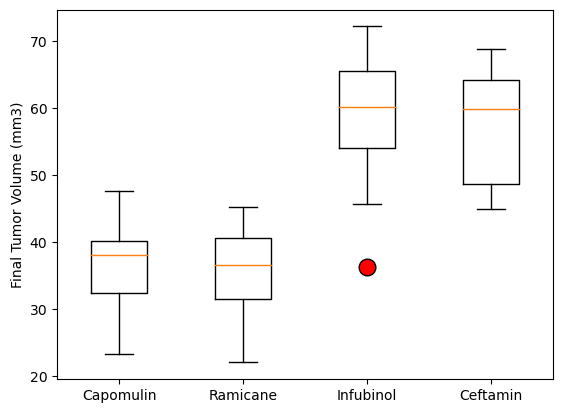

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

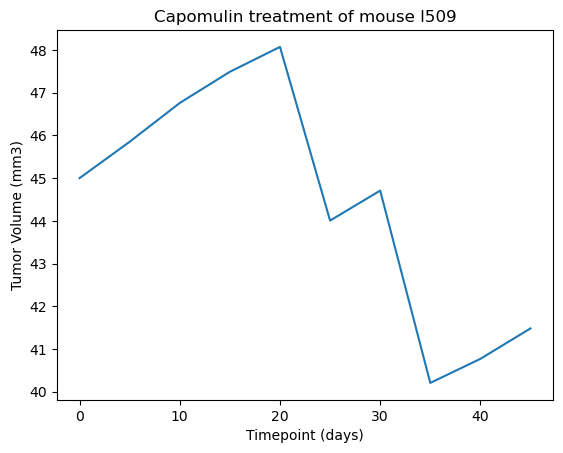

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


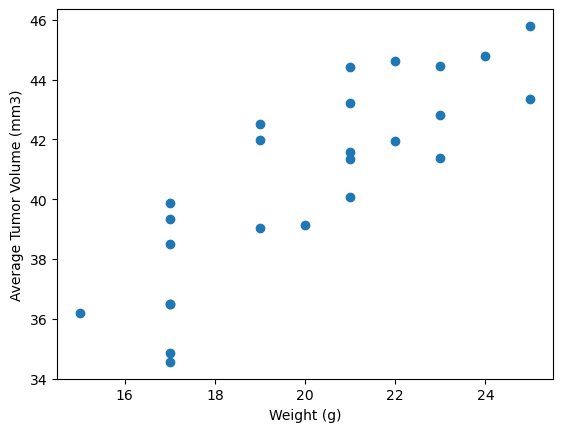

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


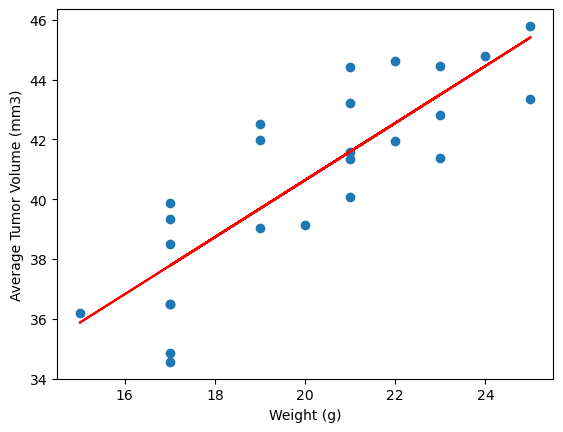

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
